In [1]:
#Run the following code to print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

## Final Exam Practice Problem

* Dang! After 2020-05-21, WindSpeed is accidentally in feet/second, not meters/second. Also, workers didn't record Rainfall if there was no rain. You’re also interested in the effect of Weekday and Month
* Predict PotholeReports using inferential models (w/o ExpectedWorkload)
* Predict ExpectedWorkload using an ML Classifier (w/o PotholeReports)

In [2]:
import pandas as pd
df = pd.read_csv("dataPotholes.csv")
df
df.dtypes
df.isna().sum()
df.describe()

,Date,PotholeReports,Temperature,Humidity,WindSpeed,Rainfall,ExpectedWorkload
0,2019-11-21,254,65.2,37,2.200000,NaN,Low
1,2019-11-21,204,65.5,38,0.800000,NaN,Low
2,2019-11-21,173,66.0,39,1.000000,NaN,Low
3,2019-11-21,107,66.2,40,0.900000,NaN,Low
4,2019-11-21,78,66.0,36,2.300000,NaN,Low
...,...,...,...,...,...,...,...
8755,2020-11-19,1003,55.8,34,8.530184,NaN,Low
8756,2020-11-19,764,56.6,37,7.545932,NaN,Low
8757,2020-11-19,694,57.4,39,0.984252,NaN,Low
8758,2020-11-19,712,57.9,41,3.280840,NaN,Low


Date                 object
PotholeReports        int64
Temperature         float64
Humidity              int64
WindSpeed           float64
Rainfall            float64
ExpectedWorkload     object
dtype: object

Date                   0
PotholeReports         0
Temperature            0
Humidity               0
WindSpeed              0
Rainfall            8232
ExpectedWorkload       0
dtype: int64

,PotholeReports,Temperature,Humidity,WindSpeed,Rainfall
count,8760.000000,8760.000000,8760.000000,8760.000000,528.000000
mean,704.602055,47.117078,58.226256,3.487925,2.466856
std,644.997468,11.944825,20.362413,2.775663,3.927524
min,0.000000,20.600000,0.000000,0.000000,0.100000
25%,191.000000,37.500000,42.000000,1.400000,0.500000
50%,504.500000,46.300000,57.000000,2.700000,1.000000
75%,1065.250000,56.500000,74.000000,4.593176,2.500000
max,3556.000000,77.800000,98.000000,22.637796,35.000000


array([[<Axes: xlabel='PotholeReports', ylabel='PotholeReports'>,
        <Axes: xlabel='Temperature', ylabel='PotholeReports'>,
        <Axes: xlabel='Humidity', ylabel='PotholeReports'>,
        <Axes: xlabel='WindSpeed', ylabel='PotholeReports'>,
        <Axes: xlabel='Rainfall', ylabel='PotholeReports'>],
       [<Axes: xlabel='PotholeReports', ylabel='Temperature'>,
        <Axes: xlabel='Temperature', ylabel='Temperature'>,
        <Axes: xlabel='Humidity', ylabel='Temperature'>,
        <Axes: xlabel='WindSpeed', ylabel='Temperature'>,
        <Axes: xlabel='Rainfall', ylabel='Temperature'>],
       [<Axes: xlabel='PotholeReports', ylabel='Humidity'>,
        <Axes: xlabel='Temperature', ylabel='Humidity'>,
        <Axes: xlabel='Humidity', ylabel='Humidity'>,
        <Axes: xlabel='WindSpeed', ylabel='Humidity'>,
        <Axes: xlabel='Rainfall', ylabel='Humidity'>],
       [<Axes: xlabel='PotholeReports', ylabel='WindSpeed'>,
        <Axes: xlabel='Temperature', ylabel='WindSp

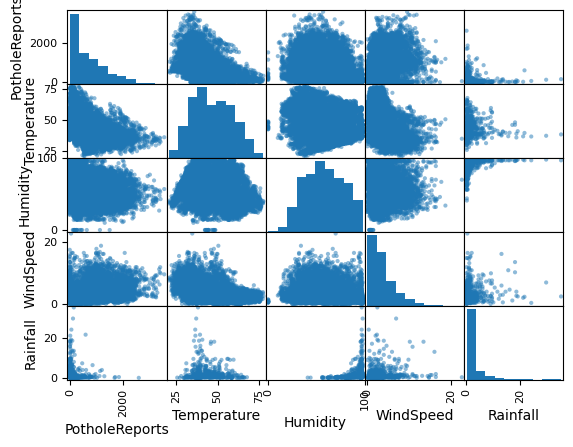

In [3]:
pd.plotting.scatter_matrix(df)

In [4]:
df["ExpectedWorkload"].value_counts()

ExpectedWorkload
Low       6719
Medium    1773
High       268
Name: count, dtype: int64

<Axes: xlabel='ExpectedWorkload'>

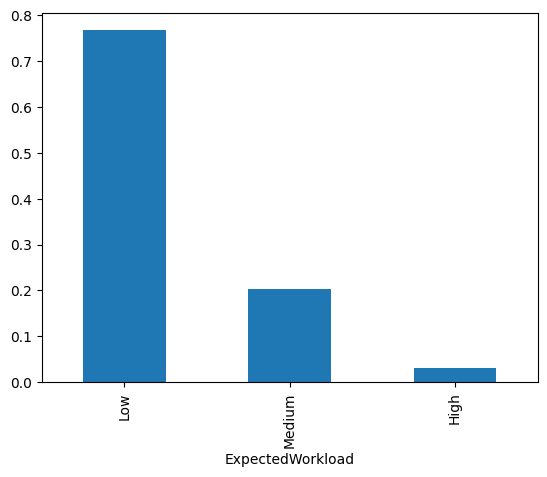

In [5]:
df["ExpectedWorkload"].value_counts(normalize = True).plot.bar()

In [6]:
df["Date2"] = pd.to_datetime(df["Date"])

In [7]:
df["WindSpeed2"] = df["WindSpeed"].copy()
df.loc[df["Date2"] > "2020-05-21", "WindSpeed2"] = df["WindSpeed2"] / 3.281
df.describe()

,PotholeReports,Temperature,Humidity,WindSpeed,Rainfall,Date2,WindSpeed2
count,8760.000000,8760.000000,8760.000000,8760.000000,528.000000,8760,8760.000000
mean,704.602055,47.117078,58.226256,3.487925,2.466856,2020-05-20 23:59:59.999999744,1.724871
min,0.000000,20.600000,0.000000,0.000000,0.100000,2019-11-21 00:00:00,0.000000
25%,191.000000,37.500000,42.000000,1.400000,0.500000,2020-02-20 00:00:00,0.900000
50%,504.500000,46.300000,57.000000,2.700000,1.000000,2020-05-21 00:00:00,1.500000
75%,1065.250000,56.500000,74.000000,4.593176,2.500000,2020-08-20 00:00:00,2.300000
max,3556.000000,77.800000,98.000000,22.637796,35.000000,2020-11-19 00:00:00,7.400000
std,644.997468,11.944825,20.362413,2.775663,3.927524,NaN,1.036286


In [8]:
df["Rainfall2"] = df["Rainfall"].fillna(0)
df.describe()
df.isna().sum()

,PotholeReports,Temperature,Humidity,WindSpeed,Rainfall,Date2,WindSpeed2,Rainfall2
count,8760.000000,8760.000000,8760.000000,8760.000000,528.000000,8760,8760.000000,8760.000000
mean,704.602055,47.117078,58.226256,3.487925,2.466856,2020-05-20 23:59:59.999999744,1.724871,0.148687
min,0.000000,20.600000,0.000000,0.000000,0.100000,2019-11-21 00:00:00,0.000000,0.000000
25%,191.000000,37.500000,42.000000,1.400000,0.500000,2020-02-20 00:00:00,0.900000,0.000000
50%,504.500000,46.300000,57.000000,2.700000,1.000000,2020-05-21 00:00:00,1.500000,0.000000
75%,1065.250000,56.500000,74.000000,4.593176,2.500000,2020-08-20 00:00:00,2.300000,0.000000
max,3556.000000,77.800000,98.000000,22.637796,35.000000,2020-11-19 00:00:00,7.400000,35.000000
std,644.997468,11.944825,20.362413,2.775663,3.927524,NaN,1.036286,1.128193


Date                   0
PotholeReports         0
Temperature            0
Humidity               0
WindSpeed              0
Rainfall            8232
ExpectedWorkload       0
Date2                  0
WindSpeed2             0
Rainfall2              0
dtype: int64

In [9]:
df["Weekday"] = df["Date2"].dt.day_name()
df["Month"] = df["Date2"].dt.month_name()
df

,Date,PotholeReports,Temperature,Humidity,WindSpeed,Rainfall,ExpectedWorkload,Date2,WindSpeed2,Rainfall2,Weekday,Month
0,2019-11-21,254,65.2,37,2.200000,NaN,Low,2019-11-21,2.200000,0.0,Thursday,November
1,2019-11-21,204,65.5,38,0.800000,NaN,Low,2019-11-21,0.800000,0.0,Thursday,November
2,2019-11-21,173,66.0,39,1.000000,NaN,Low,2019-11-21,1.000000,0.0,Thursday,November
3,2019-11-21,107,66.2,40,0.900000,NaN,Low,2019-11-21,0.900000,0.0,Thursday,November
4,2019-11-21,78,66.0,36,2.300000,NaN,Low,2019-11-21,2.300000,0.0,Thursday,November
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2020-11-19,1003,55.8,34,8.530184,NaN,Low,2020-11-19,2.599873,0.0,Thursday,November
8756,2020-11-19,764,56.6,37,7.545932,NaN,Low,2020-11-19,2.299888,0.0,Thursday,November
8757,2020-11-19,694,57.4,39,0.984252,NaN,Low,2020-11-19,0.299985,0.0,Thursday,November
8758,2020-11-19,712,57.9,41,3.280840,NaN,Low,2020-11-19,0.999951,0.0,Thursday,November


In [10]:
df["Weekday"].value_counts()

Weekday
Thursday     1272
Friday       1248
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Name: count, dtype: int64

In [11]:
df["Month"].value_counts()

Month
December     744
January      744
March        744
May          744
July         744
August       744
October      744
April        720
June         720
September    720
November     696
February     696
Name: count, dtype: int64

In [12]:
import statsmodels.formula.api as smf

In [14]:
mod1 = smf.poisson("PotholeReports ~ Temperature + Humidity + WindSpeed2 +\
                Rainfall2 + Weekday + Month", data = df).fit()
print(mod1.get_margeff().summary())

Optimization terminated successfully.
         Current function value: 147.920779
         Iterations 8
       Poisson Marginal Effects      
Dep. Variable:         PotholeReports
Method:                          dydx
At:                           overall
                          dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Weekday[T.Monday]        6.0775      1.071      5.673      0.000       3.978       8.177
Weekday[T.Saturday]    -59.2561      1.097    -54.039      0.000     -61.405     -57.107
Weekday[T.Sunday]       53.6630      1.055     50.887      0.000      51.596      55.730
Weekday[T.Thursday]     63.3168      1.043     60.733      0.000      61.273      65.360
Weekday[T.Tuesday]      47.2153      1.056     44.713      0.000      45.146      49.285
Weekday[T.Wednesday]    39.7287      1.073     37.027      0.000      37.626      41.832
Month[T.August]       -159.5496 

In [15]:
outcome = df["ExpectedWorkload"]

In [16]:
numericFeatures = df[["Temperature", "WindSpeed2", "Humidity", "Rainfall2"]]

In [17]:
dummiesWeekday = pd.get_dummies(df["Weekday"], prefix = "Weekday", drop_first = True)

In [18]:
dummiesMonth = pd.get_dummies(df["Month"], prefix = "Month", drop_first = True)

In [19]:
features = pd.concat([numericFeatures, dummiesWeekday, dummiesMonth], axis = 1)
features

,Temperature,WindSpeed2,Humidity,Rainfall2,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,65.2,2.200000,37,0.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,65.5,0.800000,38,0.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,66.0,1.000000,39,0.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,66.2,0.900000,40,0.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,66.0,2.300000,36,0.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,55.8,2.599873,34,0.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
8756,56.6,2.299888,37,0.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
8757,57.4,0.299985,39,0.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
8758,57.9,0.999951,41,0.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [20]:
from sklearn.model_selection import train_test_split
featuresTrain, featuresTest, outcomeTrain, outcomeTest = train_test_split(features,
                                                                         outcome,
                                                                         test_size = 0.33,
                                                                         random_state = 42)

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       176
         Low       1.00      1.00      1.00      4492
      Medium       1.00      1.00      1.00      1201

    accuracy                           1.00      5869
   macro avg       1.00      1.00      1.00      5869
weighted avg       1.00      1.00      1.00      5869



              precision    recall  f1-score   support

        High       0.17      0.18      0.18        92
         Low       0.84      0.83      0.83      2227
      Medium       0.35      0.35      0.35       572

    accuracy                           0.72      2891
   macro avg       0.45      0.46      0.45      2891
weighted avg       0.72      0.72      0.72      2891



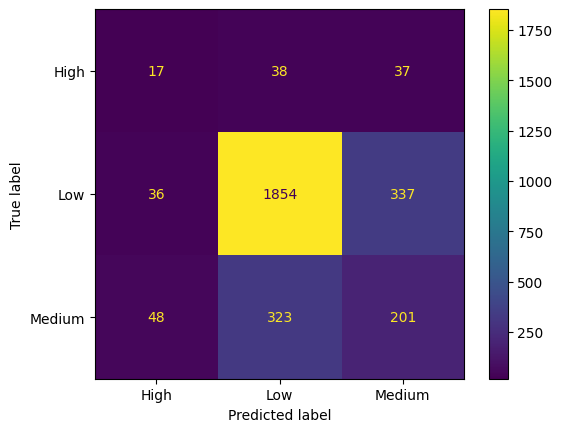

In [21]:
import sklearn.tree
modTree = sklearn.tree.DecisionTreeClassifier(random_state = 42)
resultTree = modTree.fit(featuresTrain, outcomeTrain)
predTreeTrain = modTree.predict(featuresTrain)
predTreeTest = modTree.predict(featuresTest)
print(sklearn.metrics.classification_report(outcomeTrain, predTreeTrain))
cmTree = sklearn.metrics.confusion_matrix(outcomeTest, predTreeTest)
sklearn.metrics.ConfusionMatrixDisplay(cmTree, display_labels = modTree.classes_).plot()
print(sklearn.metrics.classification_report(outcomeTest, predTreeTest))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       176
         Low       1.00      1.00      1.00      4492
      Medium       1.00      1.00      1.00      1201

    accuracy                           1.00      5869
   macro avg       1.00      1.00      1.00      5869
weighted avg       1.00      1.00      1.00      5869



              precision    recall  f1-score   support

        High       0.16      0.04      0.07        92
         Low       0.84      0.92      0.88      2227
      Medium       0.48      0.35      0.41       572

    accuracy                           0.78      2891
   macro avg       0.49      0.44      0.45      2891
weighted avg       0.75      0.78      0.76      2891



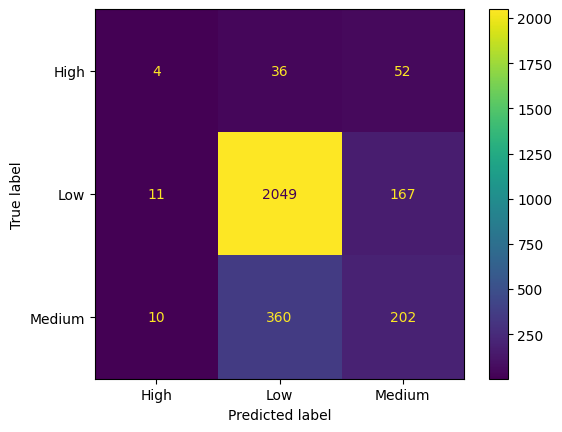

In [22]:
import sklearn.ensemble
modForest = sklearn.ensemble.RandomForestClassifier(random_state = 42)
resultForest = modForest.fit(featuresTrain, outcomeTrain)
predForestTrain = modForest.predict(featuresTrain)
predForestTest = modForest.predict(featuresTest)
print(sklearn.metrics.classification_report(outcomeTrain, predForestTrain))
cmForest = sklearn.metrics.confusion_matrix(outcomeTest, predForestTest)
sklearn.metrics.ConfusionMatrixDisplay(cmForest, display_labels = modForest.classes_).plot()
print(sklearn.metrics.classification_report(outcomeTest, predForestTest))

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
featuresTrain_norm = scaler.fit_transform(featuresTrain) #you fit to the training features
featuresTest_norm = scaler.transform(featuresTest)       #you only transform the test features

              precision    recall  f1-score   support

        High       0.00      0.00      0.00       176
         Low       0.79      0.99      0.88      4492
      Medium       0.65      0.14      0.24      1201

    accuracy                           0.78      5869
   macro avg       0.48      0.38      0.37      5869
weighted avg       0.74      0.78      0.72      5869



/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        High       0.00      0.00      0.00        92
         Low       0.79      0.99      0.88      2227
      Medium       0.52      0.10      0.16       572

    accuracy                           0.78      2891
   macro avg       0.44      0.36      0.35      2891
weighted avg       0.71      0.78      0.71      2891



/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


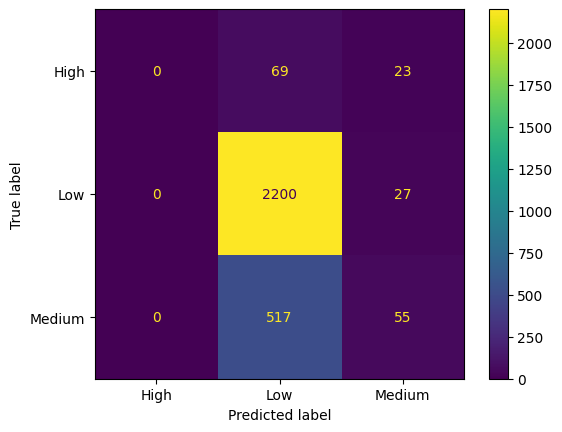

In [24]:
import sklearn.svm
modSVM = sklearn.svm.SVC(random_state = 42)
resultSVM = modSVM.fit(featuresTrain_norm, outcomeTrain)
predSVMTrain = modSVM.predict(featuresTrain_norm)
predSVMTest = modSVM.predict(featuresTest_norm)
print(sklearn.metrics.classification_report(outcomeTrain, predSVMTrain))
cmSVM = sklearn.metrics.confusion_matrix(outcomeTest, predSVMTest)
sklearn.metrics.ConfusionMatrixDisplay(cmSVM, display_labels = modSVM.classes_).plot()
print(sklearn.metrics.classification_report(outcomeTest, predSVMTest))

In [25]:
from plotnine import *

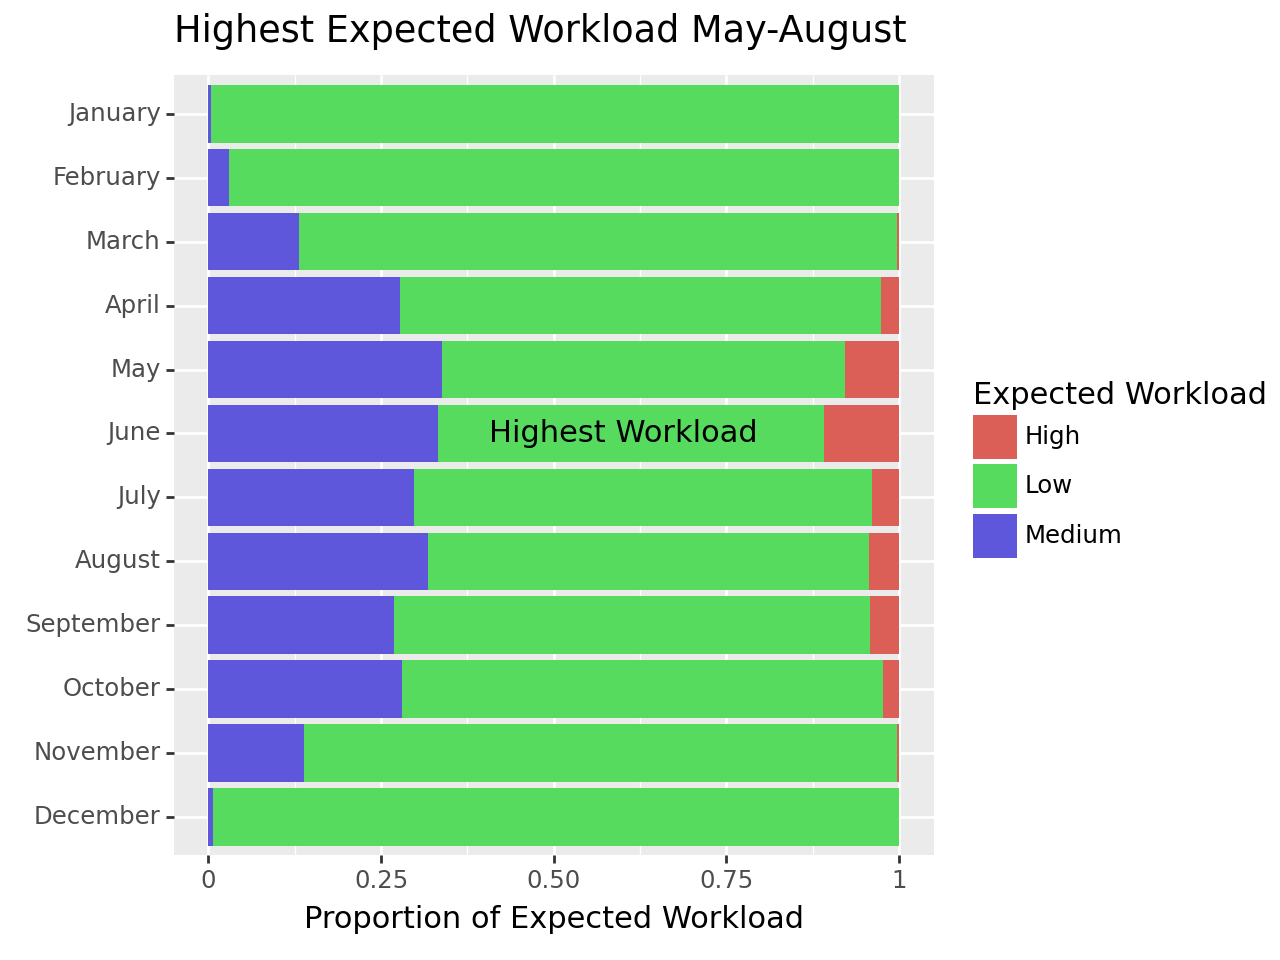

<Figure Size: (640 x 480)>

In [26]:
#p = \
(ggplot(df, aes(x = "Month", fill = "ExpectedWorkload")) +
  geom_bar(position = "fill") +
  coord_flip() +
  labs(title = "Highest Expected Workload May-August",
      x = "",
      y = "Proportion of Expected Workload",
      fill = "Expected Workload") + 
  scale_x_discrete(limits = ["December", "November", "October", "September",
                            "August", "July", "June", "May", "April", "March",
                            "February", "January"]) +
  #scale_fill_discrete(limits = ["High", "Medium", "Low"]) + 
  annotate("text", label = "Highest Workload", x = 7, y = 0.6))
#ggsave(p, "FinalPracticeGraph.png")

Since the High category has so few observations, one way to improve the model's accuracy is to combine the High and Medium categories:

In [27]:
# Combine High/Medium as 1 category vs. Low expected workload
df["LowForecast"] = df["ExpectedWorkload"] == "Low"
df

,Date,PotholeReports,Temperature,Humidity,WindSpeed,Rainfall,ExpectedWorkload,Date2,WindSpeed2,Rainfall2,Weekday,Month,LowForecast
0,2019-11-21,254,65.2,37,2.200000,NaN,Low,2019-11-21,2.200000,0.0,Thursday,November,True
1,2019-11-21,204,65.5,38,0.800000,NaN,Low,2019-11-21,0.800000,0.0,Thursday,November,True
2,2019-11-21,173,66.0,39,1.000000,NaN,Low,2019-11-21,1.000000,0.0,Thursday,November,True
3,2019-11-21,107,66.2,40,0.900000,NaN,Low,2019-11-21,0.900000,0.0,Thursday,November,True
4,2019-11-21,78,66.0,36,2.300000,NaN,Low,2019-11-21,2.300000,0.0,Thursday,November,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2020-11-19,1003,55.8,34,8.530184,NaN,Low,2020-11-19,2.599873,0.0,Thursday,November,True
8756,2020-11-19,764,56.6,37,7.545932,NaN,Low,2020-11-19,2.299888,0.0,Thursday,November,True
8757,2020-11-19,694,57.4,39,0.984252,NaN,Low,2020-11-19,0.299985,0.0,Thursday,November,True
8758,2020-11-19,712,57.9,41,3.280840,NaN,Low,2020-11-19,0.999951,0.0,Thursday,November,True


In [28]:
outcome2 = df["LowForecast"]

In [29]:
outcome2Train, outcome2Test = train_test_split(outcome2, test_size = 0.33, random_state = 42)

              precision    recall  f1-score   support

       False       0.72      0.30      0.43      1377
        True       0.82      0.96      0.88      4492

    accuracy                           0.81      5869
   macro avg       0.77      0.63      0.66      5869
weighted avg       0.79      0.81      0.78      5869



              precision    recall  f1-score   support

       False       0.70      0.28      0.40       664
        True       0.82      0.96      0.89      2227

    accuracy                           0.81      2891
   macro avg       0.76      0.62      0.64      2891
weighted avg       0.79      0.81      0.77      2891



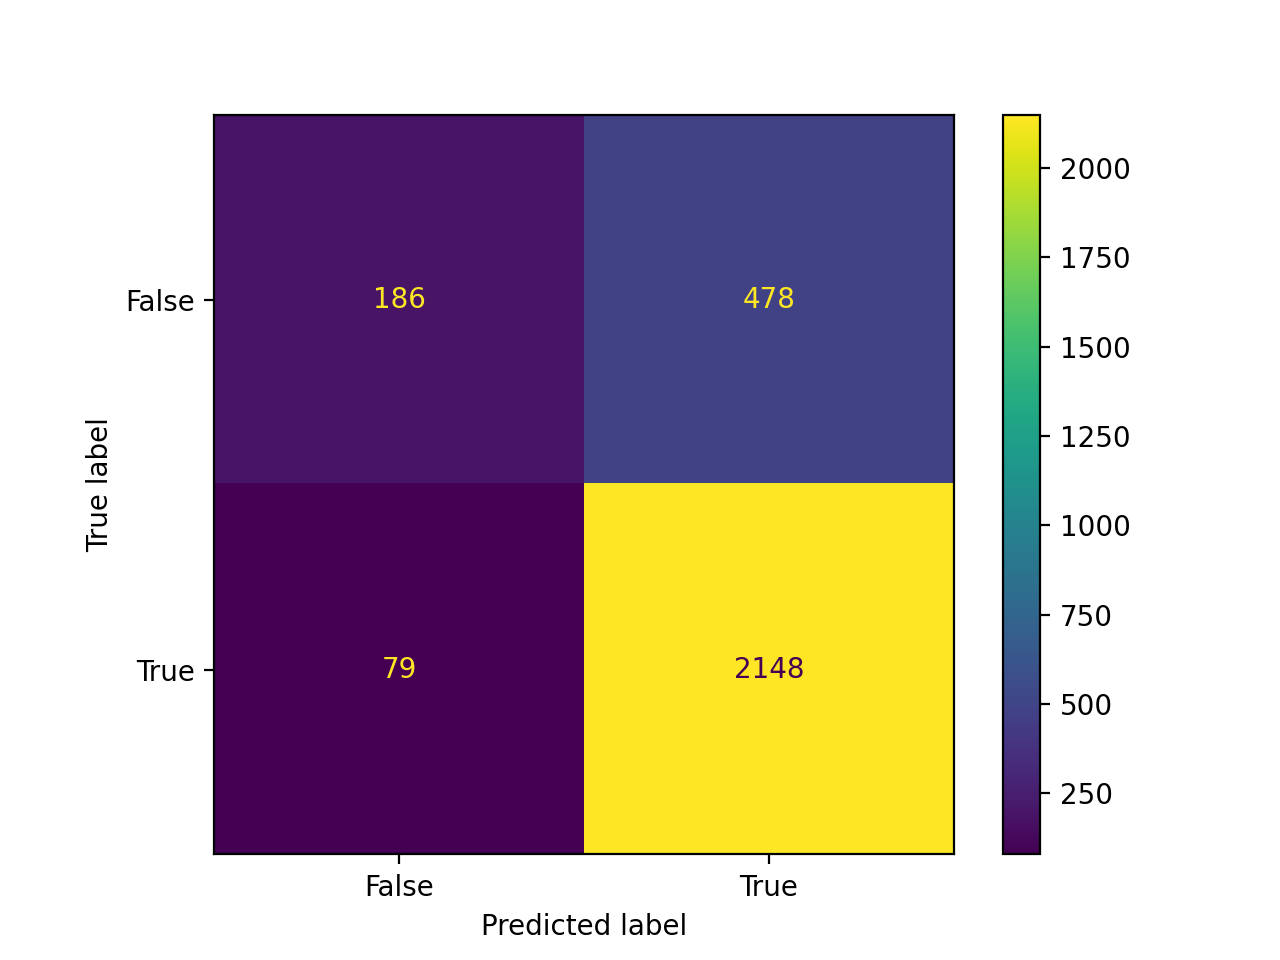

In [30]:
import sklearn.svm
modSVM2 = sklearn.svm.SVC(random_state = 42)
resultSVM2 = modSVM2.fit(featuresTrain_norm, outcome2Train)
predSVMTrain2 = modSVM2.predict(featuresTrain_norm)
predSVMTest2 = modSVM2.predict(featuresTest_norm)
print(sklearn.metrics.classification_report(outcome2Train, predSVMTrain2))
cmSVM2 = sklearn.metrics.confusion_matrix(outcome2Test, predSVMTest2)
sklearn.metrics.ConfusionMatrixDisplay(cmSVM2, display_labels = modSVM2.classes_).plot()
print(sklearn.metrics.classification_report(outcome2Test, predSVMTest2))

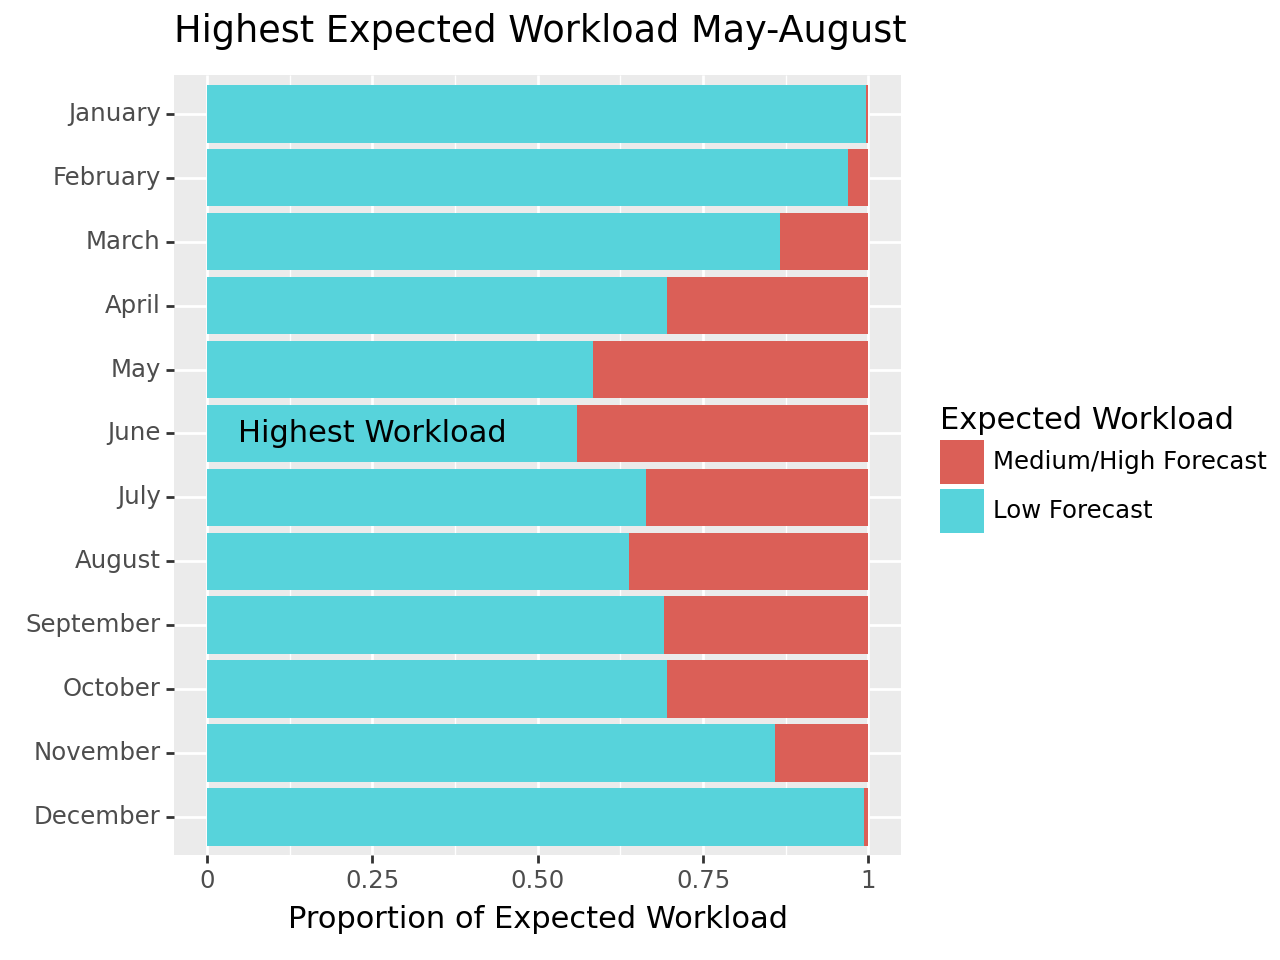

<Figure Size: (640 x 480)>

In [31]:
(ggplot(df, aes(x = "Month", fill = "LowForecast")) +
  geom_bar(position = "fill") +
  coord_flip() +
  labs(title = "Highest Expected Workload May-August",
      x = "",
      y = "Proportion of Expected Workload",
      fill = "Expected Workload") + 
  scale_x_discrete(limits = ["December", "November", "October", "September",
                            "August", "July", "June", "May", "April", "March",
                            "February", "January"]) +
  scale_fill_discrete(labels = ["Medium/High Forecast", "Low Forecast"]) +
  annotate("text", label = "Highest Workload", x = 7, y = 0.25))